In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [22]:
X, Y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

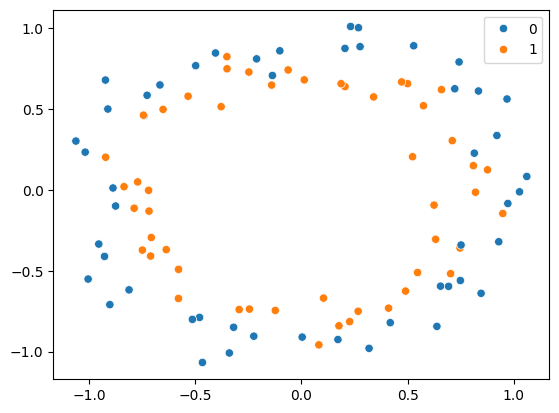

In [23]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [25]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

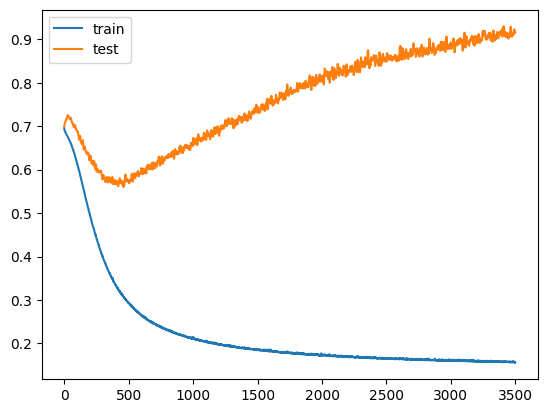

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


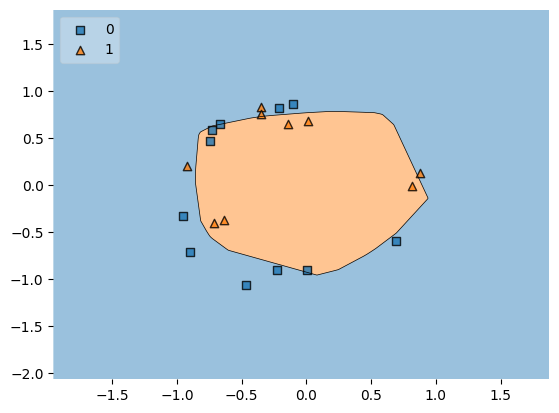

In [29]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

It is a mechanism in Keras, which knows when the epoch value is getting stable and so it stops.

In [42]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [47]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, callbacks=callback)

Epoch 1/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5508 - loss: 0.6802 - val_accuracy: 0.3500 - val_loss: 0.7221
Epoch 2/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5352 - loss: 0.6792 - val_accuracy: 0.4000 - val_loss: 0.7219
Epoch 3/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5977 - loss: 0.6703 - val_accuracy: 0.4000 - val_loss: 0.7222
Epoch 4/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5547 - loss: 0.6781 - val_accuracy: 0.4000 - val_loss: 0.7223
Epoch 5/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5391 - loss: 0.6775 - val_accuracy: 0.4000 - val_loss: 0.7225
Epoch 6/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5898 - loss: 0.6720 - val_accuracy: 0.4000 - val_loss: 0.7228
Epoch 7/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5898 - loss: 0.6636 - val_accuracy: 0.4000 - val_loss: 0.7233
Epoch 8/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5703 - loss: 0.6709 - val_accuracy: 0.4000 - val_los

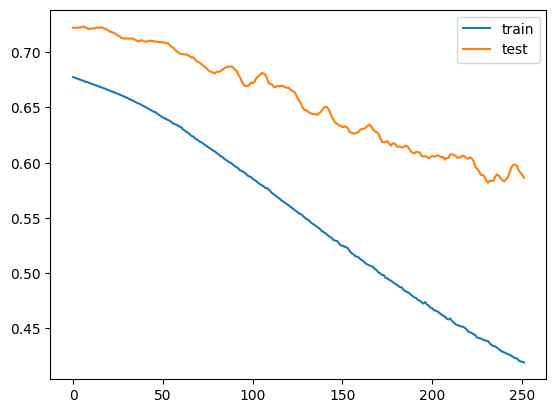

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


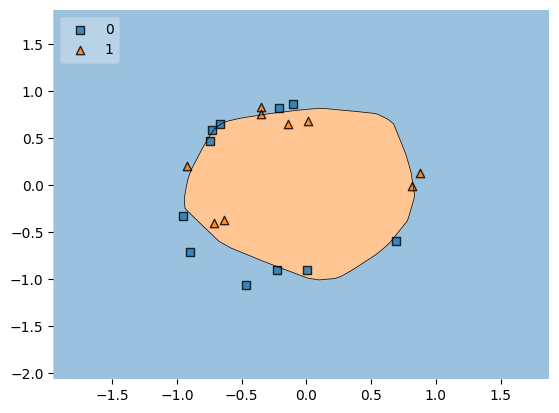

In [50]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()